# NAMA = FITRI RAMADHINI
# NIM     = 09011181722082

<div class="alert alert-info">
<h2> <center> KLASIFIKASI JAMUR AGARICUS LEPIOTA MENGGUNAKAN ARTIFICIAL NEURAL NETWORK METODE BACKPROPAGATION

### Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

### Memasukkan dataset mushrooms menggunakan pandas

In [2]:
data_sebelum_konversi=pd.read_csv("mushrooms.csv") 

In [3]:
data=pd.read_csv("mushrooms.csv")

### Menampilkan isi dari dataset mushrooms yang berformat text dalam bentuk tabel

Adapun keterangan dari dataset tersebut adalah sebagai berikut
- class : e=edible (bisa dimakan), p=poisonous(beracun)
- cap-shapes: bell=b, conical=c, covex=x, flat=f, knobbed=k, sunken=s 
- cap-surface: fibrous=f, grooves=g, scally=y, smooth=s 
- cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
- bruises: bruises=t, no=f 
- odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
- gill-attachment: attached=a, descending=d, free=f, notched=n 
- gill-spacing: close=c, crowded=w, distant=d 
- gill-size: broad=b, narrow=n 
- gill-collor: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
- stalk-shape: enlarging=e, tapering=t 
- stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
- stalk-surface-above-ring: ibrous=f, scaly=y, silky=k, smooth=s 
- stalk-surface-below-ring: ibrous=f, scaly=y, silky=k, smooth=s 
- stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
- stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
- veil-type: partial=p, universal=u 
- veil-color: brown=n, orange=o, white=w, yellow=y 
- ring-number: none=n, one=o, two=t 
- ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
- spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
- habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d 

In [4]:
data 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### Info dataset mushrooms 

Menampilkan info dari dataset mushrooms yang meliputi banyaknya indeks, jumlah baris dan kolom, serta jumlah indeks dari masing-masing atribut.

Data tersebut terdiri dari 8124 indeks dengan jumlah 23 kolom dan 8124 baris, dan di setiap atributnya memiliki 8124 indeks

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

### Menampilkan 5 data teratas dari dataset Mushrooms

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Konversi isi data

Isi data yang masih berbentuk karakter huruf, diubah menjadi nama atau keterangan dari data tersebut agar lebih jelas saat visualisasi data.

In [7]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(values4)
values5={"a":"attached","f":"free"}
data["gill-attachment"]=data["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
data["gill-spacing"]=data["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

In [8]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [9]:
edible=data[data["class"]=="e"]
poisonous=data[data["class"]=="p"]

#### *Kemungkinan seluruh grafik pada visualisasi data tidak dapat tampil tanpa koneksi internet dan backend tensorflow, dikarenakan menggunakan modul plotly.*




### Visualisasi atribut Cap-Surface, Cap-Shape, dan Cap-Color

In [10]:
class_dim = go.parcats.Dimension(
    values=data["class"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

cap_shape_dim = go.parcats.Dimension(
    values=data["cap-shape"].values,
    label="Cap Shape"
)

cap_surface_dim = go.parcats.Dimension(
  values=data["cap-surface"].values,
  label="Cap Surface"
)
cap_color_dim = go.parcats.Dimension(
  values=data["cap-color"].values,
  label="Cap Color"
)

# Create parcats trace
color = [1 if i=="e" else 0 for i in data["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data1 = [
    go.Parcats(
        dimensions=[class_dim,cap_surface_dim,cap_shape_dim,cap_color_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]


iplot(data1)

### Visualisasi atribut Bruises dalam bentuk grafik

In [11]:
data4 = [
  go.Histogram(
    histfunc = "count",
    x = edible["bruises"], 
    name = "edible",
    marker=dict(color="lightgreen",line=dict(color='darkgreen', width=5))
  ),
  go.Histogram(
    histfunc = "count",
    x = poisonous["bruises"],
    name = "poisonous",
    marker=dict(color="mistyrose",line=dict(color='maroon', width=5)),
    opacity=0.75
  )
]

layout = go.Layout(
    title='Bruises Counts with Mushroom Type',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=data4, layout=layout)
iplot(fig)

### Visualisasi atribut Odor dalam bentuk Grafik

In [12]:
odor_edible=pd.DataFrame(edible["odor"].value_counts())
odor_poisonous=pd.DataFrame(poisonous["odor"].value_counts())

layout = go.Layout(yaxis=go.layout.YAxis(title='Color'),
                   xaxis=go.layout.XAxis(
                       range=[-1200, 1200],
                     tickvals=[-1000, -700, -300, 0, 300, 700, 1000],
                       ticktext=[1000, 700, 300, 0, 300, 700, 1000],
                       title='Count'),
                   barmode='overlay',
                   bargap=0.1,
                   paper_bgcolor='rgb(243, 243, 243)',
                   plot_bgcolor='cornsilk')

data3 = [go.Bar(y=odor_edible.index,
               x=odor_edible["odor"],
               orientation='h',
               name='Edible',
               hoverinfo='x',
               marker=dict(color='lightslategrey')
               ),
        go.Bar(y=odor_poisonous.index,
               x=-1*odor_poisonous["odor"],
               orientation='h',
               name='Poisonous',
               hoverinfo='text',
               text=odor_poisonous["odor"].astype('int'),
               marker=dict(color='darksalmon')
               )]
iplot(dict(data=data3, layout=layout))

### Visualisasi atribut Gill-Attachment, Gill-Spacing, Gill-Size, dan Gill-Color dalam bentuk Grafik

In [13]:
gill_attachment_edible=pd.DataFrame(edible["gill-attachment"].value_counts())
gill_attachment_poisonous=pd.DataFrame(poisonous["gill-attachment"].value_counts())
gill_spacing_edible=pd.DataFrame(edible["gill-spacing"].value_counts())
gill_spacing_poisonous=pd.DataFrame(poisonous["gill-spacing"].value_counts())
gill_size_edible=pd.DataFrame(edible["gill-size"].value_counts())
gill_size_poisonous=pd.DataFrame(poisonous["gill-size"].value_counts())
gill_color_edible=pd.DataFrame(edible["gill-color"].value_counts())
gill_color_poisonous=pd.DataFrame(poisonous["gill-color"].value_counts())

In [14]:
trace0 = go.Scatter(
    x = gill_attachment_edible.index,
    y = gill_attachment_edible["gill-attachment"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace1 = go.Scatter(
    x = gill_attachment_poisonous.index,
    y = gill_attachment_poisonous["gill-attachment"],
    mode = 'markers',
    name = 'Poisonous',
       marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                   symbol=220
                   )
)
trace2 = go.Scatter(
    x = gill_spacing_edible.index,
    y = gill_spacing_edible["gill-spacing"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace3 = go.Scatter(
    x = gill_spacing_poisonous.index,
    y = gill_spacing_poisonous["gill-spacing"],
    mode = 'markers',
    name = 'Poisonous',
       marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                    symbol=220
                   )
)
trace4 = go.Scatter(
    x = gill_size_edible.index,
    y = gill_size_edible["gill-size"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace5 = go.Scatter(
    x = gill_size_poisonous.index,
    y = gill_size_poisonous["gill-size"],
    mode = 'markers',
    name = 'Poisonous',
       marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                   symbol=220
                   )
)
trace6 = go.Scatter(
    x = gill_color_edible.index,
    y = gill_color_edible["gill-color"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace7 = go.Scatter(
    x = gill_color_poisonous.index,
    y = gill_color_poisonous["gill-color"],
    mode = 'markers',
    name = 'Poisonous',
     marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                   symbol=220
                   )
)

fig = tools.make_subplots(rows=2, cols=2, 
                          subplot_titles=('Gill Attachment','Gill Size', 'Gill Spacing',"Gill Color"))


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 1, 2)
fig.append_trace(trace5, 1, 2)
fig.append_trace(trace6, 2, 2)
fig.append_trace(trace7, 2, 2)

fig['layout'].update(showlegend=False,height=800, width=800, title='Gill Properties' ,paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="moccasin")
iplot(fig)

C:\Users\User\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Visualisasi atribut Stalk-Shape, Stalk-Root, Stalk-Surface-Above-Ring, Stalk-Surface-Below-Ring, Stalk-Color-Above-Ring, dan Stalk-Color-Below-Ring dalam bentuk Grafik

In [15]:
stalk_shape_edible=pd.DataFrame(edible["stalk-shape"].value_counts())
stalk_shape_poisonous=pd.DataFrame(poisonous["stalk-shape"].value_counts())
stalk_root_edible=pd.DataFrame(edible["stalk-root"].value_counts())
stalk_root_poisonous=pd.DataFrame(poisonous["stalk-root"].value_counts())
stalk_surface_above_ring_edible=pd.DataFrame(edible["stalk-surface-above-ring"].value_counts())
stalk_surface_above_ring_poisonous=pd.DataFrame(poisonous["stalk-surface-above-ring"].value_counts())
stalk_surface_below_ring_edible=pd.DataFrame(edible["stalk-surface-below-ring"].value_counts())
stalk_surface_below_ring_poisonous=pd.DataFrame(poisonous["stalk-surface-below-ring"].value_counts())
stalk_color_above_ring_edible=pd.DataFrame(edible["stalk-color-above-ring"].value_counts())
stalk_color_above_ring_poisonous=pd.DataFrame(poisonous["stalk-color-above-ring"].value_counts())
stalk_color_below_ring_edible=pd.DataFrame(edible["stalk-color-below-ring"].value_counts())
stalk_color_below_ring_poisonous=pd.DataFrame(poisonous["stalk-color-below-ring"].value_counts())

In [16]:
data8=[go.Scatterpolar(
      r = list(stalk_shape_edible["stalk-shape"].values),
      theta = stalk_shape_edible.index,
      fill = 'toself',
      name = "Edible",
    thetaunit = "radians",
    ),
 go.Scatterpolar(
      r = list(stalk_shape_poisonous["stalk-shape"].values),
      theta = stalk_shape_poisonous.index,
      fill = 'toself',
      name = 'Poisonous',
    thetaunit = "radians"
    ),
go.Scatterpolar(
      r = stalk_root_edible["stalk-root"].values,
      theta = stalk_root_edible.index,
      fill = 'toself',
      name = "Edible",
    thetaunit = "radians",
     subplot = "polar2"
    ),
go.Scatterpolar(
      r = stalk_root_poisonous["stalk-root"].values,
      theta =stalk_root_poisonous.index,
      fill = 'toself',
      name = 'Poisonous',
    subplot = "polar2",
    thetaunit = "radians"
    ),
go.Scatterpolar(
      r = stalk_surface_above_ring_edible["stalk-surface-above-ring"].values,
      theta = stalk_surface_above_ring_edible.index,
      fill = 'toself',
      name = "Edible",
    subplot = "polar3",
     thetaunit = "radians"
    ),
go.Scatterpolar(
      r = stalk_surface_above_ring_poisonous["stalk-surface-above-ring"].values,
      theta = stalk_surface_above_ring_poisonous.index,
      fill = 'toself',
      name = 'Poisonous',
    subplot = "polar3",
     thetaunit = "radians"
    ),
go.Scatterpolar(
        r = stalk_surface_below_ring_edible["stalk-surface-below-ring"].values,
      theta = stalk_surface_below_ring_edible.index,
      fill = 'toself',
      name = "Edible",
    subplot = "polar4"
    ),
go.Scatterpolar(
      r = stalk_surface_below_ring_poisonous["stalk-surface-below-ring"].values,
      theta = stalk_surface_below_ring_poisonous.index,
      fill = 'toself',
      name = "Poisonoıs",
    subplot = "polar4",
    
    ),]
layout = go.Layout(
    showlegend=False,
    paper_bgcolor='white',
    title="STALK PROPERTIES",
    font=dict(family='Gravitas One',size=20,color='darkred'),
     
    
    polar = dict(
      bgcolor="linen",
      domain = dict(
        y = [0.60, 0.90],
        x = [0, 0.48]
      ),
      radialaxis = dict(
             visible = False,
        angle = 45
      ),
      angularaxis = dict(
        direction = "clockwise",
        period = 6,
          gridwidth=3,
          tickfont=dict(size=11,color="black"),
      )
    ),
    polar2 = dict(
        bgcolor="linen",
      domain = dict(
        y = [0.60, 0.90],
        x = [0.52, 1]
      ),
      radialaxis = dict(
             visible = False,
        angle = 45
      ),
      angularaxis = dict(
        direction = "clockwise",
        period = 5,
           gridwidth=3,
          tickfont=dict(size=11,color="black"),
      )),
     polar3 = dict(
         bgcolor="linen",
      domain = dict(
        x = [0, 0.48],
        y = [0, 0.30]
      ),
      
    radialaxis = dict(
             visible = False,
        
        angle = 45
      ),
      angularaxis = dict(
        direction = "clockwise",
        period = 6,
           gridwidth=3,
          tickfont=dict(size=11,color="black"),
      )
     
    ),
    polar4 = dict(
         bgcolor="linen",
      domain = dict(
        y = [0, 0.30],
        x = [0.52, 1]
      ),
   radialaxis = dict(
             visible = False,
        angle = 45,
       
      ),
      angularaxis = dict(
        direction = "clockwise",
        period = 4,
           gridwidth=3,
          tickfont=dict(size=11,color="black")
      )
    ),
     annotations=[dict(showarrow=False,text="Stalk Shape",x=0.18,y=1.05,xref="paper",yref="paper",font=dict(size=15,color="midnightblue"),bgcolor="lightyellow",borderwidth=5),
                                  dict(showarrow=False,text="Stalk Root",x=0.83,y=1.05,xref="paper",yref="paper",font=dict(size=15,color="midnightblue"),bgcolor="lightyellow",borderwidth=5),
                 dict(showarrow=False,text="Stalk Surface Above Ring",x=0.13,y=0.40,xref="paper",yref="paper",font=dict(size=15,color="midnightblue"),bgcolor="lightyellow",borderwidth=5),
                 dict(showarrow=False,text="Stalk Surface Below Ring",x=0.88,y=0.40,xref="paper",yref="paper",font=dict(size=15,color="midnightblue"),bgcolor="lightyellow",borderwidth=5)]
)

fig = go.Figure(data=data8,layout=layout)
iplot(fig)

In [17]:
value1=stalk_color_above_ring_edible["stalk-color-above-ring"].values
label1=stalk_color_above_ring_edible.index
value2=stalk_color_above_ring_poisonous["stalk-color-above-ring"].values
label2=stalk_color_above_ring_poisonous.index
value3=stalk_color_below_ring_edible["stalk-color-below-ring"].values
label3=stalk_color_below_ring_edible.index
value4=stalk_color_below_ring_poisonous["stalk-color-below-ring"].values
label4=stalk_color_below_ring_poisonous.index

trace1=go.Bar(
      x = value1,
      y =label1 ,
      name='Edible- Stalk Color Above Ring',
    orientation = 'h',
    marker = dict(
        color = "darksalmon",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3),
        opacity=0.8,
    ))
    
trace2=go.Bar(
     x = value2 ,
     y = label2,
      name='Poisonous-Stalk Color Above Ring',
    orientation = 'h',
    marker = dict(
        color = "plum",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
    
trace3=go.Bar(
     x = value3,
     y = label3,
            name='Edible-Stalk Color Below Ring',
    orientation = 'h',
    marker = dict(
        color = "palegreen",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
   
trace4=go.Bar(
      x =value4 ,
      y =label4 ,
             name='Poisonous- Stalk Color Below Ring',
    orientation = 'h',
    marker = dict(
        color = "sienna",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
   

fig= tools.make_subplots(rows=1, cols=2,subplot_titles=('Stalk Color Counts Above Ring','Stalk Color Counts Below Rings'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

fig['layout'].update(showlegend=True,height=600, width=800, barmode='stack',legend=dict(x=.58, y=-0.1,orientation="h",font=dict(size=11,color='#000')),
                     title='Stalk Colors Above and Below Ring')
iplot(fig)

### Visualisasi atribut Veil-Color dalam bentuk grafik 

In [18]:
edible_veil_color=pd.DataFrame(edible["veil-color"].value_counts())
poisonous_veil_color=pd.DataFrame(poisonous["veil-color"].value_counts())

In [19]:
trace1 = go.Bar(
    x=edible_veil_color.index,
    y=edible_veil_color["veil-color"].values,
    text=edible_veil_color["veil-color"].values,
    textposition = 'auto',
    name="Edible",
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=poisonous_veil_color.index,
    y=poisonous_veil_color["veil-color"],
    text=poisonous_veil_color["veil-color"],
    name="Poisonous",
    textposition = 'auto',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
    
)
Layout=go.Layout(
    title='Veil Colors',
    barmode='stack',
    paper_bgcolor='rgba(245, 246, 249, 1)',
    plot_bgcolor='rgba(245, 246, 249, 1)'
   
)

data65 = [trace1,trace2]
fig = go.Figure(data=data65, layout=Layout)
iplot(fig)

### Visualisasi atribut ring number dalam bentuk grafik 

In [20]:
import plotly.figure_factory as ff

z=[[0, 3680, 528], [36, 3808, 72]]

x=['None', 'One', 'Two']
y = ['Edible', 'Poisonous']

z_text = [["0", '3680', '528'],  
          ['36', '3808', '72']]

fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Blackbody')
iplot(fig)

### Visualisasi atribut Ring-Type dalam bentuk grafik 

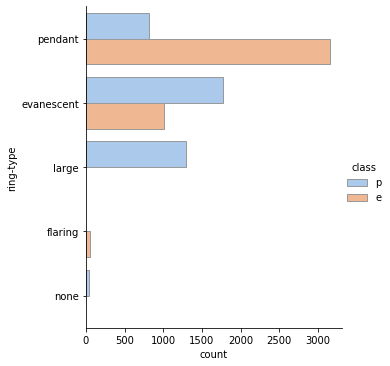

In [21]:
sns.catplot(y="ring-type", hue="class", kind="count",height=5,
            palette="pastel", edgecolor=".6",
            data=data)

In [22]:
fig = {
  "data": [
    {
      "values": [1744,1648,576,48,48,48,48,48],
      "labels": ['Brown','Black','White','Orange',"Purple","Chocolate","Yellow","Buff"],
      "domain": {"column": 0},
      "name": "Edible Mushrooms",
      "hoverinfo":"label+percent+name",
      "type": "pie",
         "hole": .4,
        'marker': {'colors': ['brown', 'black', 'white', 'orange',"purple","sienna","yellow","peru"],
                  "line":{"color":'#000000',"width":2}}
    },
    {
      "values": [1812,1584,224,224,72],
      "labels": ["White","Chocolate","Brown","Black","Green"],   
      "domain": {"column": 1},
      "name": "Poisonous Mushrooms",
      "hoverinfo":"label+percent+name",
         "hole": .4,
      "type": "pie",
        "marker": {"colors":["white","sienna","brown","black","green"],
                  "line":{"color":'#000000',"width":2}}

    }],
  "layout": {
      
        "title":"Edible and Poisonous Mushrooms Spore Print Color Percentages",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Edible",
                "x": 0.20,
                "y": 1.05
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Poisonous",
                "x": 0.85,
                "y": 1.05
            }
        ]
    }
}
iplot(fig)

### Visualisasi atribut Population dan Habitat dalam bentuk Grafik

In [23]:
class_dim = go.parcats.Dimension(
    values=data["class"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

population_dim = go.parcats.Dimension(
    values=data["population"].values,
    label="Population"
)

habitat_dim = go.parcats.Dimension(
  values=data["habitat"].values,
  label="Habitat"
)


# Create parcats trace
color = [1 if i=="e" else 0 for i in data["class"]]
colorscale = [[0, 'coral'], [1, 'gray']];
data19 = [
    go.Parcats(
        dimensions=[class_dim,population_dim,habitat_dim],
        line={'color': color,"showscale":True,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Arial'},
        tickfont={'size': 16, 'family': 'Arial'},
        arrangement='freeform',
    )

]


iplot(data19)

# ANN (Artificial Neural Network)

### Normalisasi Data

Pada ANN tidak bisa memproses data dalam bentuk teks. Oleh karena itu, data dinormalisasi dan dikonversi menjadi bentuk angka.

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [25]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0
5,0,2,2,9,0,0,1,0,0,1,...,3,7,7,0,2,1,4,0,2,0
6,0,0,3,8,0,0,1,0,0,4,...,3,7,7,0,2,1,4,0,2,2
7,0,0,2,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,3,2
8,1,2,2,8,0,7,1,0,1,7,...,3,7,7,0,2,1,4,0,4,0
9,0,0,3,9,0,0,1,0,0,4,...,3,7,7,0,2,1,4,0,3,2


### Menampilkan data sebelum dikonversi atau dinormalisasi

In [26]:
data_sebelum_konversi

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### Pemisahan data input dan output

- y merupakan output yaitu class (edible dan poisonous).
- x merupakan input yaitu seluruh data selain class.

In [27]:
y = data["class"].values
x = data.drop(["class"],axis=1)

In [28]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [29]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0
5,2,2,9,0,0,1,0,0,1,0,...,3,7,7,0,2,1,4,0,2,0
6,0,3,8,0,0,1,0,0,4,0,...,3,7,7,0,2,1,4,0,2,2
7,0,2,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,3,2
8,2,2,8,0,7,1,0,1,7,0,...,3,7,7,0,2,1,4,0,4,0
9,0,3,9,0,0,1,0,0,4,0,...,3,7,7,0,2,1,4,0,3,2


### Splitting

Data displit sebesar 80% data Train dan 20% data Test. 
Di bawah ini diinput data Test sebesar 0.2 atau 20% dari keseluruhan data dan untuk size dari data Train secara otomatis mengambil sisa size dari data Test yaitu sebesar 0.8 atau 80%.

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

### Fungsi

Fungsi aktivasi yang digunakan pada Klasifikasi Jamur Agaricus Lepiota ini adalah fungsi ReLU dan fungsi Sigmoid.

- Fungsi ReLU merupakan fungsi yang digunakan pada kontex convolutional neural networks.
ReLU pada intinya hanya membuat pembatas pada bilangan nol, artinya apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x.
Adapun persamaan dari fungsi ini adalah sebagai berikut ; 

\begin{equation}
  f(x) = \frac{1}{1 + e^{-x}} 
\end{equation}


- Fungsi sigmoid merupakan fungsi yang digunakan untuk memperoleh output yang bersifat nonlinear.
Alasan digunakan fungsi sigmoid biner ini dikarenakan output dari fungsi ini memiliki range nilai antara 0 dan 1, sesuai dengan output yang akan kita cari pada dataset mushrooms ini, yaitu edible (0) dan poisonous (1).
Adapun persamaan dari fungsi ini adalah sebagai berikut ;

\begin{equation}
  R (z) = max(0,z)
\end{equation}


Pada fungsi optimizer digunakan fungsi adam dan pada fungsi loss digunakan fungsi binary crossentropy.

- Cross-entropy adalah fungsi loss default yang digunakan untuk masalah klasifikasi biner. Ini dimaksudkan untuk digunakan dengan klasifikasi biner di mana nilai target berada di set {0, 1}. 
Secara matematis, ini adalah fungsi loss yang lebih disukai di bawah inference framework of maximu likelihood. Ini adalah fungsi loss yang harus dievaluasi terlebih dahulu dan hanya diubah jika anda memiliki alasan yang bagus.
Cross-entropy akan menghitung skor yang merangkum perbedaan rata-rata antara distribusi probabilitas aktual dan prediksi untuk kelas prediksi 1. Skor tersebut diminimalkan dan nilai cross-entropy yang baik adalah 0.
Cross-entropy dapat ditentukan sebagai fungsi loss di Keras dengan menetapkan ‘binary_crossentropy‘ saat menyusun model. Fungsi ini mensyaratkan bahwa lapisan output dikonfigurasikan dengan satu simpul dan aktivasi ‘sigmoid in untuk memprediksi probabilitas untuk kelas 1.


- ADAM (adaptive moment estimation) adalah variant dari algoritma gradient descent yang lain.

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense 
def build_classifier():
    classifier = Sequential() 
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 70,batch_size=10)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/70
4332/4332 [==============================] - 4s 889us/step - loss: 0.5681 - accuracy: 0.7461
Epoch 2/70
4332/4332 [==============================] - 1s 339us/step - loss: 0.3821 - accuracy: 0.9104
Epoch 3/70
4332/4332 [==============================] - 2s 471us/step - loss: 0.2634 - accuracy: 0.9513
Epoch 4/70
4332/4332 [==============================] - 2s 406us/step - loss: 0.2058 - accuracy: 0.9621
Epoch 5/70
4332/4332 [==============================] - 2s 411us/step - loss: 0.1714 - accuracy: 0.9679
Epoch 6/70
 370/4332 [=>............................] - ETA: 3s - loss: 0.1690 - accuracy: 0.9595

C:\Users\User\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning:

Method (on_train_batch_end) is slow compared to the batch update (0.139997). Check your callbacks.



4332/4332 [==============================] - 2s 469us/step - loss: 0.1467 - accuracy: 0.9728
Epoch 7/70
4332/4332 [==============================] - 2s 383us/step - loss: 0.1310 - accuracy: 0.9730
Epoch 8/70
4332/4332 [==============================] - 1s 298us/step - loss: 0.1218 - accuracy: 0.9718
Epoch 9/70
4332/4332 [==============================] - 2s 351us/step - loss: 0.1087 - accuracy: 0.9771
Epoch 10/70
4332/4332 [==============================] - 2s 392us/step - loss: 0.1056 - accuracy: 0.9751
Epoch 11/70
4332/4332 [==============================] - 2s 399us/step - loss: 0.1002 - accuracy: 0.9774
Epoch 12/70
4332/4332 [==============================] - 1s 339us/step - loss: 0.0952 - accuracy: 0.9783
Epoch 13/70
4332/4332 [==============================] - 2s 413us/step - loss: 0.0939 - accuracy: 0.9771
Epoch 14/70
4332/4332 [==============================] - 2s 425us/step - loss: 0.0898 - accuracy: 0.9792
Epoch 15/70
4332/4332 [==============================] - 2s 409us/step

### Epoch

Epoch adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation), karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches). Jumlah epoch untuk data yang dipakai adalah sebanyak 70.


Batch Size adalah jumlah sampel data yang disebarkan ke Neural Network. Batch Size untuk data yang dipakai adalah 10

In [32]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)

Train on 1300 samples, validate on 325 samples
Epoch 1/70
1300/1300 [==============================] - 1s 938us/step - loss: 0.6756 - accuracy: 0.6162 - val_loss: 0.6129 - val_accuracy: 0.7877
Epoch 2/70
1300/1300 [==============================] - 0s 369us/step - loss: 0.4820 - accuracy: 0.8600 - val_loss: 0.3947 - val_accuracy: 0.8677
Epoch 3/70
1300/1300 [==============================] - 0s 369us/step - loss: 0.3296 - accuracy: 0.8769 - val_loss: 0.3388 - val_accuracy: 0.8738
Epoch 4/70
1300/1300 [==============================] - 1s 415us/step - loss: 0.2798 - accuracy: 0.8969 - val_loss: 0.3001 - val_accuracy: 0.8738
Epoch 5/70
1300/1300 [==============================] - 1s 446us/step - loss: 0.2454 - accuracy: 0.9185 - val_loss: 0.2748 - val_accuracy: 0.8985
Epoch 6/70
1300/1300 [==============================] - 1s 546us/step - loss: 0.2197 - accuracy: 0.9269 - val_loss: 0.2482 - val_accuracy: 0.9015
Epoch 7/70
1300/1300 [==============================] - 1s 454us/step - loss:

C:\Users\User\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning:

Method (on_train_batch_end) is slow compared to the batch update (0.119993). Check your callbacks.



1300/1300 [==============================] - 1s 546us/step - loss: 0.1347 - accuracy: 0.9562 - val_loss: 0.1592 - val_accuracy: 0.9631
Epoch 14/70
1300/1300 [==============================] - 0s 377us/step - loss: 0.1295 - accuracy: 0.9608 - val_loss: 0.1529 - val_accuracy: 0.9662
Epoch 15/70
1300/1300 [==============================] - 0s 331us/step - loss: 0.1203 - accuracy: 0.9646 - val_loss: 0.1501 - val_accuracy: 0.9446
Epoch 16/70
1300/1300 [==============================] - 0s 346us/step - loss: 0.1200 - accuracy: 0.9608 - val_loss: 0.1449 - val_accuracy: 0.9508
Epoch 17/70
1300/1300 [==============================] - 0s 377us/step - loss: 0.1153 - accuracy: 0.9654 - val_loss: 0.1412 - val_accuracy: 0.9692
Epoch 18/70
1300/1300 [==============================] - 1s 431us/step - loss: 0.1154 - accuracy: 0.9685 - val_loss: 0.1375 - val_accuracy: 0.9723
Epoch 19/70
1300/1300 [==============================] - 1s 400us/step - loss: 0.1113 - accuracy: 0.9669 - val_loss: 0.1375 - val_

C:\Users\User\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning:

Method (on_train_batch_end) is slow compared to the batch update (0.307338). Check your callbacks.



1300/1300 [==============================] - 2s 1ms/step - loss: 0.0218 - accuracy: 0.9962 - val_loss: 0.0551 - val_accuracy: 0.9877
Epoch 64/70
1300/1300 [==============================] - 1s 1ms/step - loss: 0.0209 - accuracy: 0.9962 - val_loss: 0.0553 - val_accuracy: 0.9846
Epoch 65/70
1300/1300 [==============================] - 1s 731us/step - loss: 0.0203 - accuracy: 0.9977 - val_loss: 0.0542 - val_accuracy: 0.9877
Epoch 66/70
1300/1300 [==============================] - 1s 577us/step - loss: 0.0194 - accuracy: 0.9969 - val_loss: 0.0506 - val_accuracy: 0.9877
Epoch 67/70
1300/1300 [==============================] - 1s 715us/step - loss: 0.0191 - accuracy: 0.9969 - val_loss: 0.0494 - val_accuracy: 0.9908
Epoch 68/70
1300/1300 [==============================] - 1s 792us/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 0.0480 - val_accuracy: 0.9877
Epoch 69/70
1300/1300 [==============================] - 1s 815us/step - loss: 0.0168 - accuracy: 0.9977 - val_loss: 0.0504 - val_accu

### Training Results

Menghitung dan menampilkan Hasil Training yang meliputi label Accuracy Score, Classification Report (Precision, Recall, f1-Score, Support), dan Confusion Matrix

In [33]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,x_train,y_train,x_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(x_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(x_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(x_train))))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(x_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(x_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(x_test))))


In [34]:
print_score(classifier,x_train,y_train,x_test,y_test,train=True)

Training results:

Accuracy Score: 0.9845

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3388
           1       0.97      1.00      0.98      3111

    accuracy                           0.98      6499
   macro avg       0.98      0.99      0.98      6499
weighted avg       0.98      0.98      0.98      6499


Confusion Matrix:
[[3287  101]
 [   0 3111]]



### Model Accuracy dan Model Loss 

Menampilkan plot atau grafik dari nilai model accuracy dan model loss.

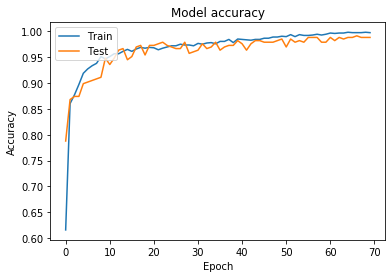

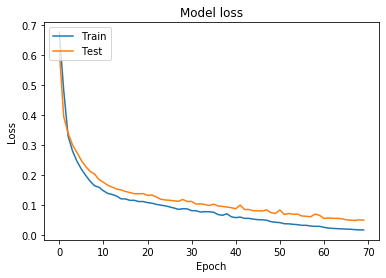

In [35]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.style.use('ggplot')

### Accuracy Score

Menampilkan nilai akurasi yang didapat berdasarkan training data dari dataset. Dapat dilihat bahwa tingkat akurasinya adalah sebesar 0.9738

In [36]:
print('Tingkat Akurasinya adalah: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(x_train))))

Tingkat Akurasinya adalah: 0.9845



*Kemungkinan seluruh grafik pada visualisasi data tidak dapat tampil tanpa koneksi internet dan backend tensorflow, dikarenakan menggunakan modul plotly.*